# Mini Project 1

**2025 Introduction to Quantiative Methods in Finance**

**The Erdös Institute**

**Instructions** Use current stock data to create two potentially profitable investment portfolios. One that is higher risk and one that is lower risk.

-- You are to interpret and explain your interpretation of a high risk profile and low risk profile of a portfolio. You should provide some measurable quantitative data in your explanation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.optimize import minimize
import datetime as dt
sns.set_style('darkgrid')

import yfinance as yf

In [2]:
tickers = ['AAL','UAL','DAL']

start_date = dt.datetime.today()-dt.timedelta(days = 999)
end_date = dt.datetime.today()

stock = yf.download(tickers, start = start_date, end =end_date)

C:\Users\owenc\AppData\Local\Temp\ipykernel_24076\48700479.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock = yf.download(tickers, start = start_date, end =end_date)
[*********************100%***********************]  3 of 3 completed


In [3]:
stock.head()

Price       Close                         High                          Low  \
Ticker        AAL        DAL        UAL    AAL        DAL        UAL    AAL   
Date                                                                          
2022-10-03  11.92  27.673532  32.810001  12.23  27.908552  33.099998  11.65   
2022-10-04  12.95  30.111856  35.330002  13.05  30.180403  35.419998  12.30   
2022-10-05  12.87  29.886627  35.419998  12.96  30.111854  35.619999  12.43   
2022-10-06  12.73  29.984552  34.959999  13.00  30.278326  35.680000  12.40   
2022-10-07  12.18  28.780081  33.860001  12.54  29.592856  34.700001  11.95   

Price                              Open                          Volume  \
Ticker            DAL        UAL    AAL        DAL        UAL       AAL   
Date                                                                      
2022-10-03  26.635531  31.580000  12.02  27.399343  32.360001  41156700   
2022-10-04  28.642985  33.950001  12.31  28.642985  33.990002  47616000   
2022-10-05  29.181568  34.310001  12.63  29.377418  34.590000  28172500   
2022-10-06  29.524305  34.250000  12.77  29.661401  35.200001  31569300   
2022-10-07  28.456929  33.430000  12.50  29.573273  34.700001  37297700   

Price                           
Ticker           DAL       UAL  
Date                            
2022-10-03  11053600   8905200  
2022-10-04  16308100  12024900  
2022-10-05   8523000   8573500  
2022-10-06  10688100   9808700  
2022-10-07  11051700   9386400

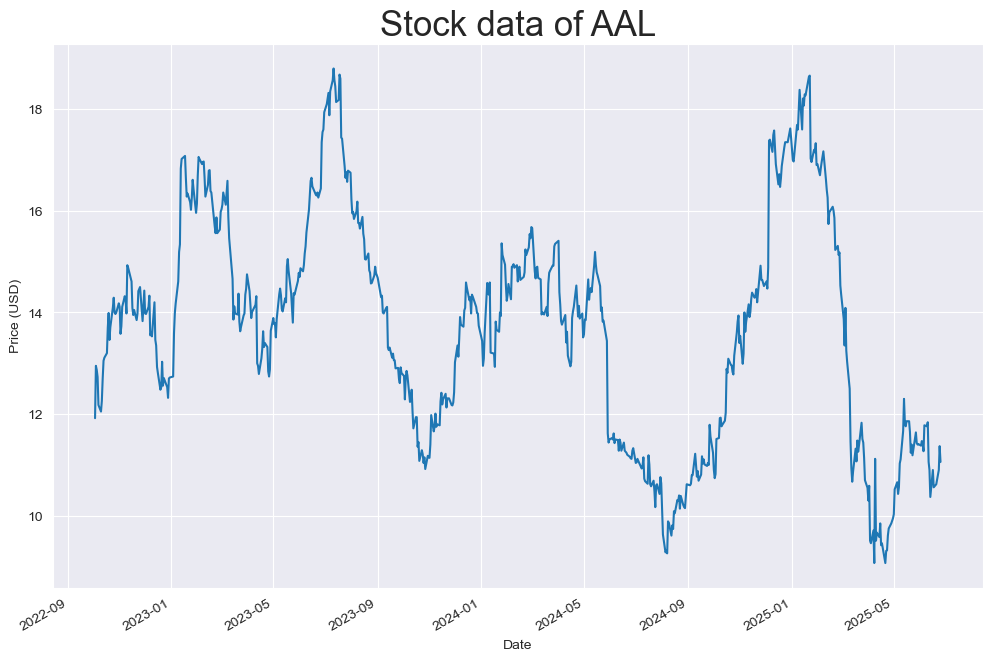

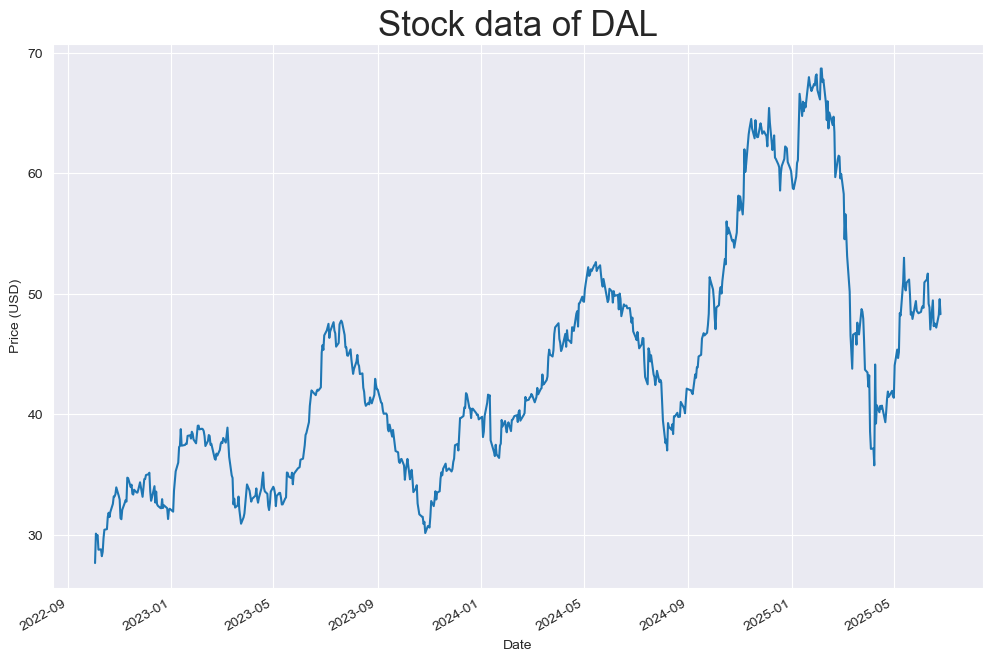

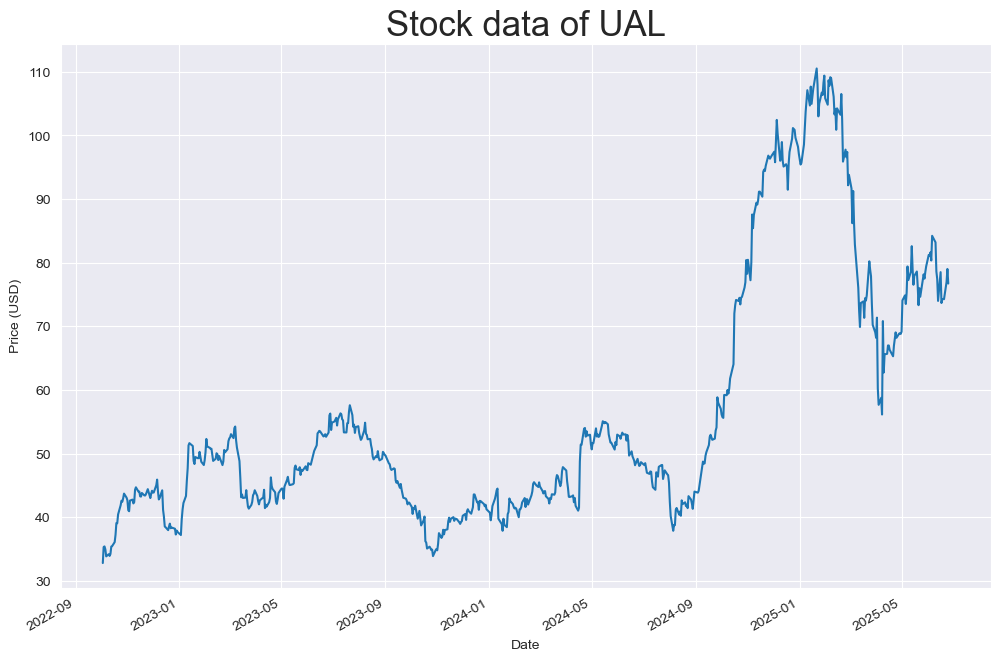

In [4]:
ticker = 'AAL'
stock['Close'][ticker].plot(figsize = (12,8))
plt.title(f'Stock data of {ticker}', size = 25)
plt.ylabel('Price (USD)')
plt.show()

ticker = 'DAL'
stock['Close'][ticker].plot(figsize = (12,8))
plt.title(f'Stock data of {ticker}', size = 25)
plt.ylabel('Price (USD)')
plt.show()

ticker = 'UAL'
stock['Close'][ticker].plot(figsize = (12,8))
plt.title(f'Stock data of {ticker}', size = 25)
plt.ylabel('Price (USD)')
plt.show()

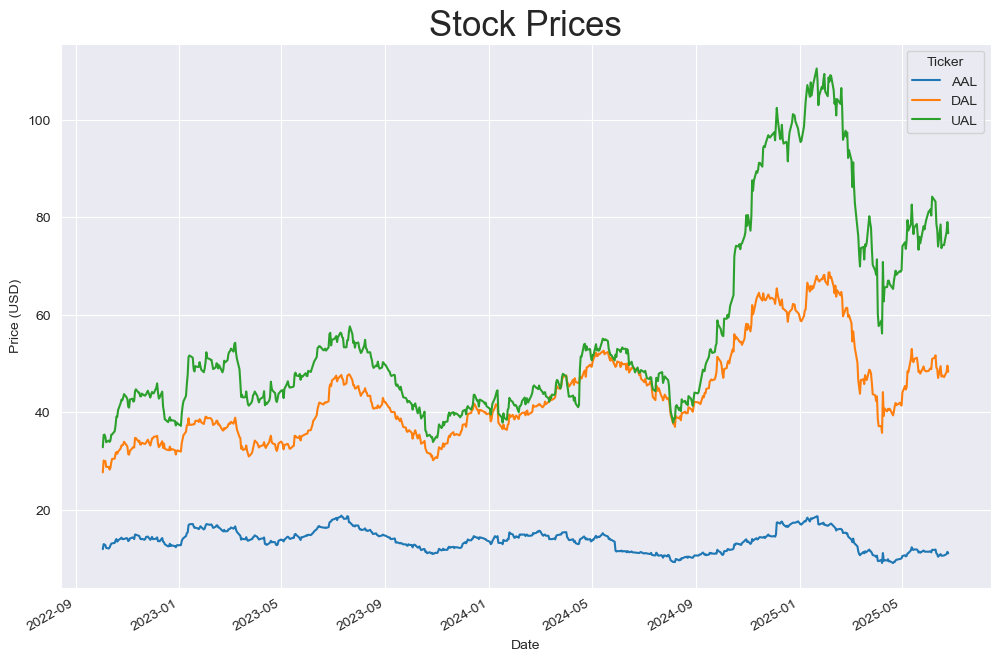

In [5]:
stock['Close'].plot(figsize = (12,8))
plt.title(f'Stock Prices', size = 25)
plt.ylabel('Price (USD)')
plt.show()


In [6]:
AA_close = stock['Close']['AAL']
AA_daily_log_returns = np.log(stock['Close']['AAL']/stock['Close']['AAL'].shift(1))
AA_daily_log_returns = AA_daily_log_returns.dropna()
print(f'Volatility of American Airliens is then {np.std(AA_daily_log_returns)*np.sqrt(251)}')

Volatility of American Airliens is then 0.4449935718892683


In [7]:
DL_close = stock['Close']['DAL']
DL_daily_log_returns = np.log(stock['Close']['DAL']/stock['Close']['DAL'].shift(1))
DL_daily_log_returns = DL_daily_log_returns.dropna()
print(f'Volatility of Delta Air Lines is then {np.std(DL_daily_log_returns)*np.sqrt(251)}')

Volatility of Delta Air Lines is then 0.3821800905711277


In [8]:
UA_close = stock['Close']['UAL']
UA_daily_log_returns = np.log(stock['Close']['UAL']/stock['Close']['UAL'].shift(1))
UA_daily_log_returns = UA_daily_log_returns.dropna()
print(f'Volatility of United Airlines is then {np.std(UA_daily_log_returns)*np.sqrt(251)}')

Volatility of United Airlines is then 0.4598825772382375


In [9]:
AA_daily_log_returns.mean()

-0.00010963782430964303

In [10]:
UA_daily_log_returns.mean(), DL_daily_log_returns.mean()

(0.0012438644525778122, 0.0008157571837604659)

It is thus clear that United Airlines is highest risk, highest reward. American Airlines is lowest reward and almost as high risk as United. Delta has intermediate returns, but lowest risk (And as someone who has taken his share of domestic flights, these descriptions tend to be fitting).

While including some American stock will improve diversification, one should focus on the other two.
A portfolio of 60% United, 20% Delta, 20% American is high risk, but higher reward.
A portfolio of 20% United, 60% Delta, 20% American is low risk, but lower reward.